# Ford GoBike EDA
## by Alexander Keller

## Preliminary Wrangling

When are most trips taken in terms of time of day, day of the week, or month of the year?
How long does the average trip take?
Does the above depend on if a user is a subscriber or customer?
Are there a "hot-spots" somewhere?


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
df = pd.read_csv("201902-fordgobike-tripdata.csv")
# about observations
print(f"Dataframe has {df.shape[0]} rows and {df.shape[1]} columns.")

Dataframe has 183412 rows and 16 columns.


In [3]:
# about the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
# about to get an idea
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [5]:
# about some statistics
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [6]:
df.user_type.unique()

array(['Customer', 'Subscriber'], dtype=object)

In [7]:
df.member_gender.unique()

array(['Male', nan, 'Other', 'Female'], dtype=object)

In [8]:
df.bike_share_for_all_trip.unique()

array(['No', 'Yes'], dtype=object)

### What is the structure of your dataset?

The data was provided as a CSV file and loaded into a dataframe with pandas. There are 183412 total observation with 16 features. The data has some (less than 5%) missing observions an can be imputed by the median or dropped later.
There are three categorical features:
- user_type: customer, subscriber
- member_gender: Male, Other, Female
- bike_share_for_all_trip: Yes, No
- start_station_name: name of the station
- end_station_name: name of the station

There are 13 numerical faetures
- duration_sec: duration of sharing in seconds  
- start_time: timestamp when start 
- end_time: timestamp when ended
- start_station_id: float id of the station to the name
- start_station_latitude: float value of the latitute
- start_station_longitude: float value of the longitude
- end_station_id: float id of the station
- end_station_latitude: float of the latitude
- end_station_longitude: float value of the longitude
- bike_id: int value of the bike  
- member_birth_year: float value

### What is/are the main feature(s) of interest in your dataset?

The main concerns about the dataset are in the given questions about
- When are most trips taken in terms of time of day, day of the week, or month of the year?
- How long does the average trip take?
- Does the above depend on if a user is a subscriber or customer?
- Is there a "hot spot" somewhere?
- Does the gender plays a role?
- Do certain age groups use the service more or less?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

For the time it's necessary to have the start_time feature available and extract each value of time, day, month and year.
To get the average trip, the duration_sec column is important.
To get an idea if a subscriber or a customer use the service longer, the user_type feature is of interest.
Same goes for the member_gender column.
For the "hot spot" question, the start_station_id is important, names are less important here, only to the top3 later.
To answer the qestion about age groups, the age has to be calculated and then put in to groups.

## Data Cleaning

In [9]:
# given the missing data is only about 5%, lets drop the the observations and reset the index
df_clean = df.dropna().reset_index().drop(['index'], axis = 1)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

In [10]:
# check for duplicates
sum(df.duplicated())

0

In [11]:
# separate the start timestamp in hour, day, month
# 2019-02-28 17:32:10.1450
from datetime import datetime
#date = datetime.strptime(df.start_time[0], "%Y-%m-%d %H:%M:%S.%f")
#date
df_clean['start_month'] = df_clean.start_time.apply(lambda ts: datetime.strptime(ts, "%Y-%m-%d %H:%M:%S.%f").month)
df_clean['start_weekday'] = df_clean.start_time.apply(lambda ts: datetime.strptime(ts, "%Y-%m-%d %H:%M:%S.%f").weekday())
df_clean['start_hour'] = df_clean.start_time.apply(lambda ts: datetime.strptime(ts, "%Y-%m-%d %H:%M:%S.%f").hour)

In [12]:
df_clean[['start_month', 'start_weekday', 'start_hour']]

,start_month,start_weekday,start_hour
0,2,3,17
1,2,3,12
2,2,3,17
3,2,3,23
4,2,3,23
...,...,...,...
174947,2,4,0
174948,2,4,0
174949,2,4,0
174950,2,4,0


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

### Average duration of bike trips

In [13]:
# have a look at the duration
df_clean.duration_sec.describe()

count    174952.000000
mean        704.002744
std        1642.204905
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

Having a mean of about 700 and a standard deviation of about 1650 with a minimum of 60, seems a little odd.

In [14]:
df_clean.duration_sec.quantile(.99)

3176.0

Text(0.5, 1.0, 'Average duration of bikesharing')

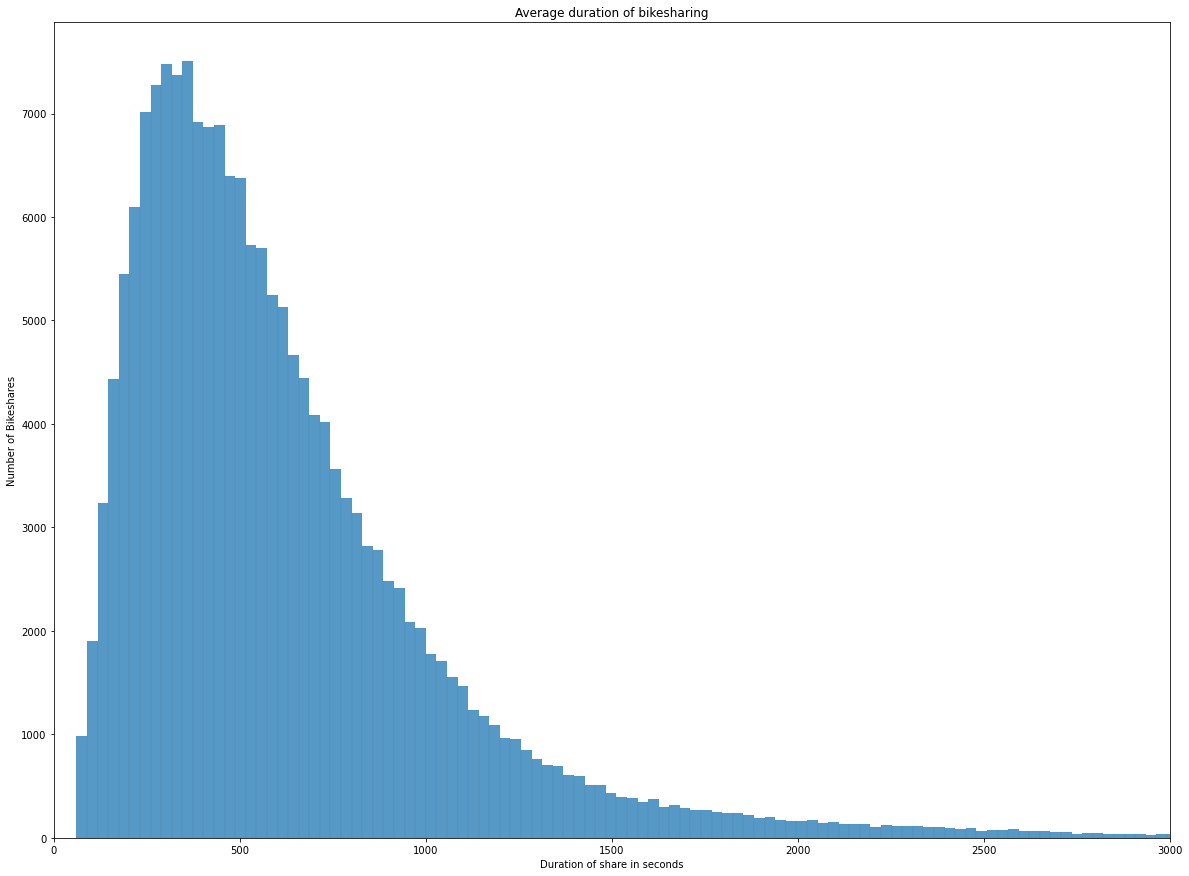

In [15]:
# plot a histogramm with a xlimit of 3000 captures almost 99% of all data
plt.figure(figsize = (20, 15))
plt.ylabel('Number of Bikeshares')
plt.xlabel('Duration of share in seconds')
sns.histplot(df.duration_sec, bins = 3000)
plt.xlim(0,3000)
plt.title('Average duration of bikesharing')

> Having a median of about 510 seconds, a mean of 704, gives us an idea that the average bike ride took about 10 minutes...
Which seems indeed a decent distance, taking an average speed of 15 km/h (~4 m/s) leads to approximately 2.5 km distance. That's also a great indicator that some people prefer thinking of the environment by neither using overstacked puplic transport or cars...

### Most common weekday and hour

Text(0.5, 1.0, 'Bikeshares during the week')

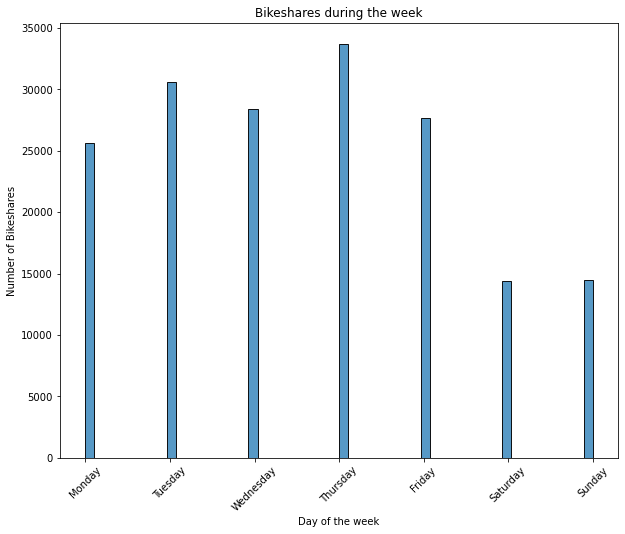

In [16]:
plt.figure(figsize=(10,8))
plt.ylabel('Number of Bikeshares')
plt.xlabel('Day of the week')
chart = sns.histplot(df_clean.start_weekday)
chart.set_xticks(range(7))
chart.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday' ,'Friday', 'Saturday', 'Sunday'], rotation = 45)
plt.title('Bikeshares during the week')

The plot shows, that during the week there are significant more people using the bikesharing than on the weekend. So, it's a good indicator that a lot of people using the service to commute to work.

<AxesSubplot:title={'center':'Bike shares throughout the day'}, xlabel='Time of the day', ylabel='Number of Bikeshares'>

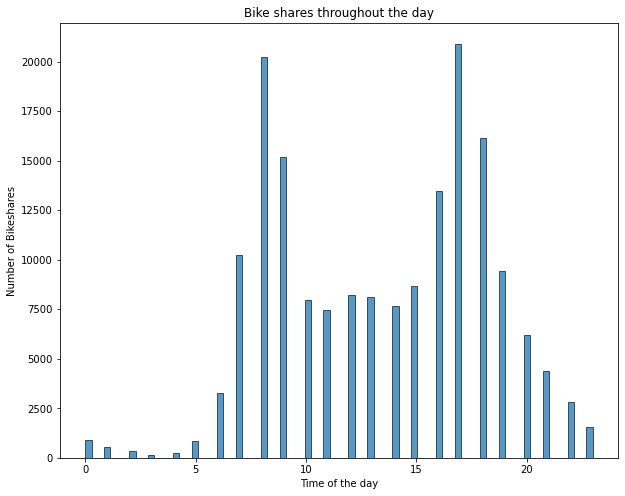

In [17]:
plt.figure(figsize=(10,8))
plt.title('Bike shares throughout the day')
plt.ylabel('Number of Bikeshares')
plt.xlabel('Time of the day')
sns.histplot(df_clean.start_hour)

> It can be clearly seen, that there are two peaks during the day (8am and 5pm, 9am and 6pm). That can mean, that most of the people using the bike service to commute to their workplace. Moreover during the weekend, there are significant less people using the bike sharing service.

### Usertype ratio

In [18]:
# count the members
user_types = df_clean.user_type.value_counts()
user_types

Subscriber    158386
Customer       16566
Name: user_type, dtype: int64

/home/alex/anaconda3/envs/NN/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'Number of Bikeshares by Subscribers and Customers'}, xlabel='User Type', ylabel='user_type'>

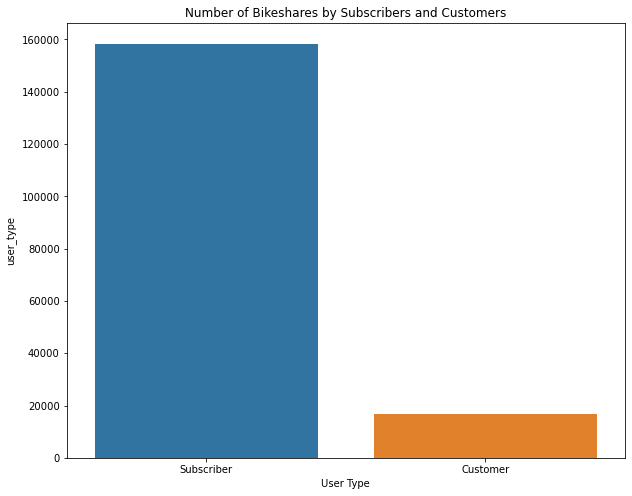

In [19]:
# in a barplot
plt.figure(figsize = (10,8))
plt.title('Number of Bikeshares by Subscribers and Customers')
plt.ylabel('Number of Bikeshares')
plt.xlabel('User Type')
sns.barplot(user_types.index, user_types)

In [20]:
# ratio of subscriber vs customer
user_types.Subscriber/user_types.Customer

9.560907883617046

> There are almost 10 times (9.56) more subscribers than customers.

### Bikerides based on age

In [21]:
# calculate current age
current_year = 2020
df_clean['member_age'] = current_year - df_clean.member_birth_year.astype(int)

In [22]:
# get a statistics and  plot a histogram
df_clean.member_age.describe()

count    174952.000000
mean         35.196865
std          10.118731
min          19.000000
25%          28.000000
50%          33.000000
75%          40.000000
max         142.000000
Name: member_age, dtype: float64

In [23]:
# lets find out who is over 140
df_clean[df_clean.member_age > 140].tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_month,start_weekday,start_hour,member_age
26352,1474,2019-02-25 09:28:42.1610,2019-02-25 09:53:17.0680,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,386.0,24th St at Bartlett St,37.752105,-122.419724,6436,Customer,1878.0,Female,No,2,0,9,142


In [24]:
# looks like a typo, replace with a correction
df_clean['member_birth_year'] = df_clean.member_birth_year.apply(lambda x: 1978 if x == 1878 else x)
# replace every one older than 100 with the average birth year
birth_mean = df_clean['member_birth_year'].mean()
df_clean['member_birth_year'] = df_clean.member_birth_year.apply(lambda x: birth_mean if x < 1920 else x)

(18.0, 80.0)

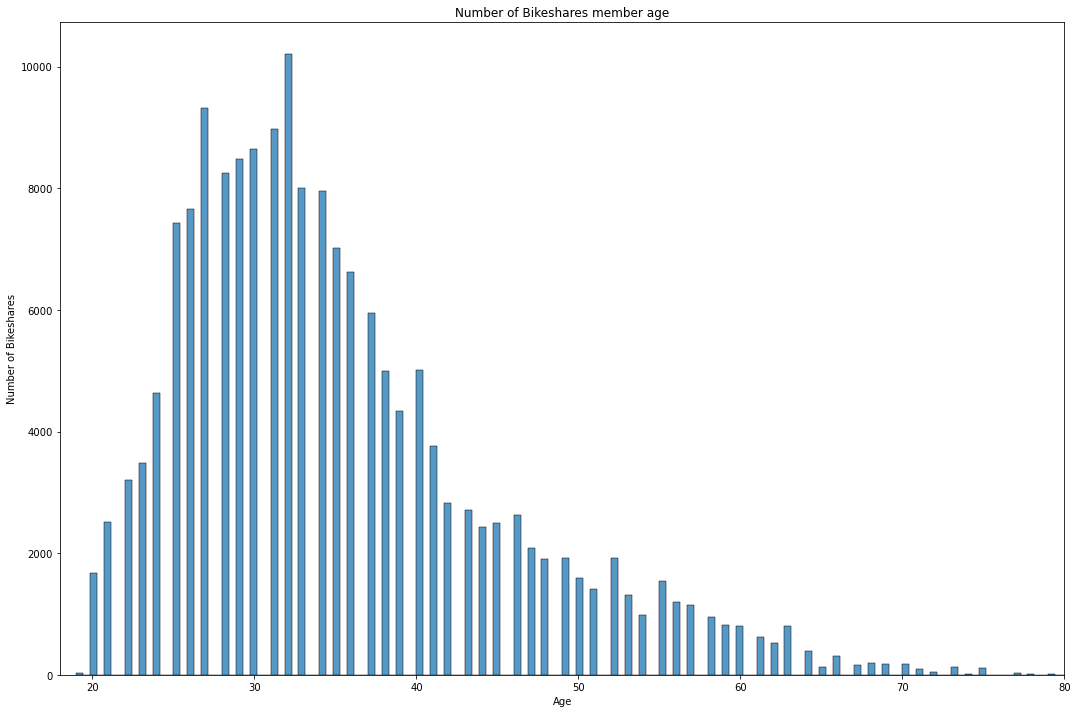

In [25]:
# recalculate age, show distplot
plt.figure(figsize = (18,12))
plt.title('Number of Bikeshares member age')
plt.ylabel('Number of Bikeshares')
plt.xlabel('Age')
df_clean['member_age'] = current_year - df_clean.member_birth_year.astype(int)
sns.histplot(df_clean.member_age)
plt.xlim(18,80)

In [26]:
df_clean.member_age.describe()

count    174952.000000
mean         35.162422
std           9.971976
min          19.000000
25%          28.000000
50%          33.000000
75%          40.000000
max         100.000000
Name: member_age, dtype: float64

The average people who is using the service is about 35 years old. Outliers due to not entering the birthyear where imputed by the mean age. One person seemed to enter the hundreds wrong, were the birth year was manually adjusted.

### Stations

<AxesSubplot:title={'center':'Number of Bikeshares Start station id'}, xlabel='Station ID', ylabel='Number of Bikeshares'>

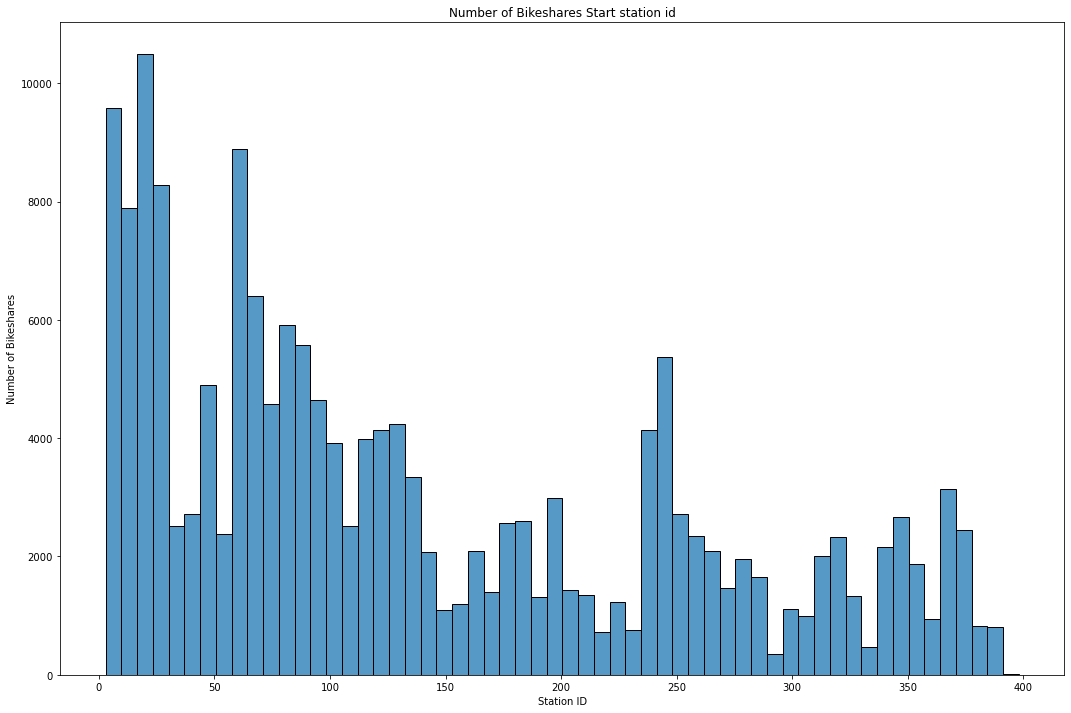

In [27]:
# visual inspection
plt.figure(figsize = (18,12))
plt.title('Number of Bikeshares Start station id')
plt.ylabel('Number of Bikeshares')
plt.xlabel('Station ID')
sns.histplot(df_clean.start_station_id)

In [28]:
# check some statistics
df_clean.start_station_id.value_counts().describe()

count     329.000000
mean      531.768997
std       551.962376
min         2.000000
25%       155.000000
50%       374.000000
75%       732.000000
max      3649.000000
Name: start_station_id, dtype: float64

In [29]:
top10 = df_clean.start_station_id.value_counts().sort_values(ascending=False).head(10)
top10

58.0    3649
67.0    3408
81.0    2952
21.0    2711
3.0     2620
30.0    2577
15.0    2541
22.0    2216
16.0    2191
5.0     2144
Name: start_station_id, dtype: int64

In [30]:
top10_index = df_clean.start_station_id.value_counts().sort_values(ascending=False).head(10).index

In [31]:
top10_names = []
# get the names to the IDs
for i in top10_index:
    top10_names.append(df_clean[df_clean.start_station_id.values == i].iloc[0]['start_station_name'])

In [43]:
# inspection
print(f"Top 10 stations out of 329 stations (about {round(10 / 329 * 100,2)} % make about {round(sum(top10.values)/df_clean.shape[0] * 100,2)} % of all bikeshares")

Top 10 stations out of 329 stations (about 3.04 % make about 15.44 % of all bikeshares


## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Any correlation somewhere?

Text(0.5, 1.0, 'Correlation of all measurable features')

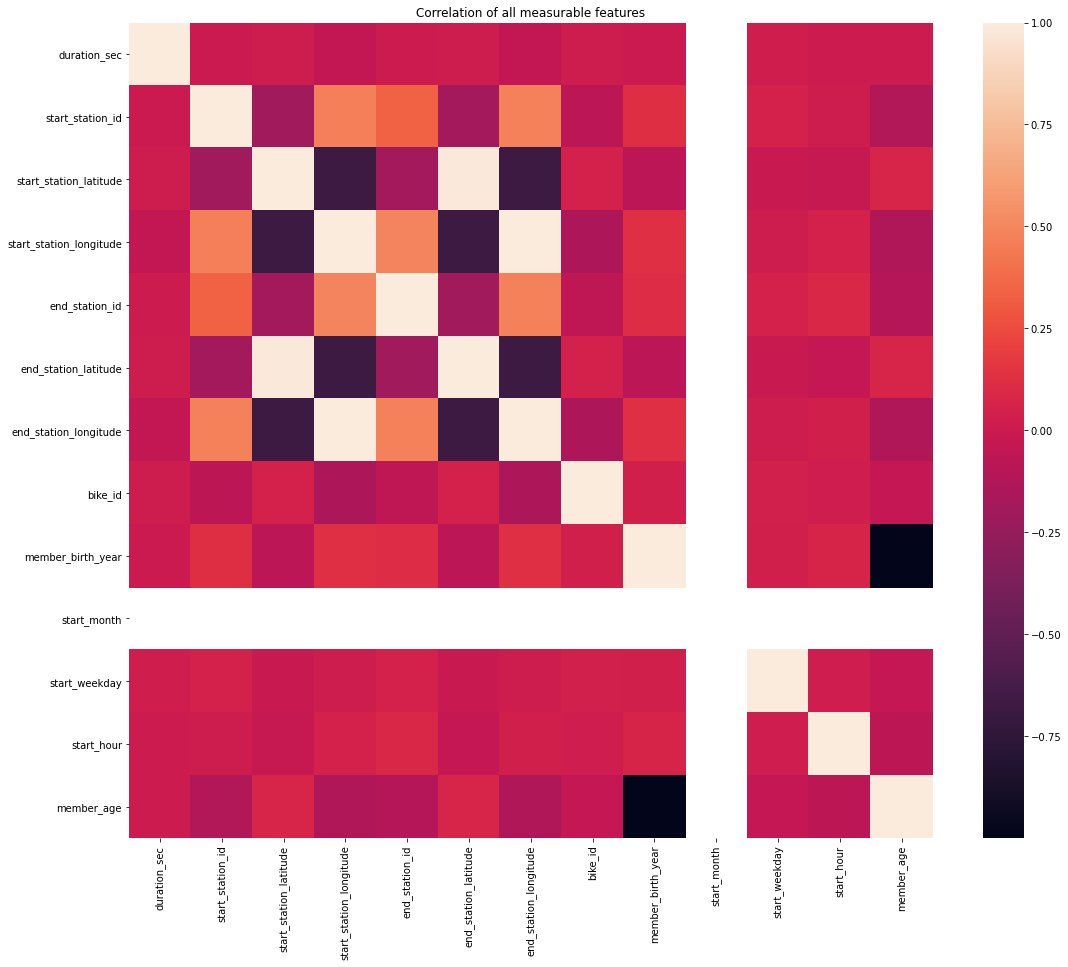

In [33]:
plt.figure(figsize = (18, 15))
sns.heatmap(df_clean.corr())
plt.title('Correlation of all measurable features')

There is no useful correlation between the features within the dataframe.

### Do some genders use share bikes longer?

Text(0.5, 1.0, 'Average duration of different genders')

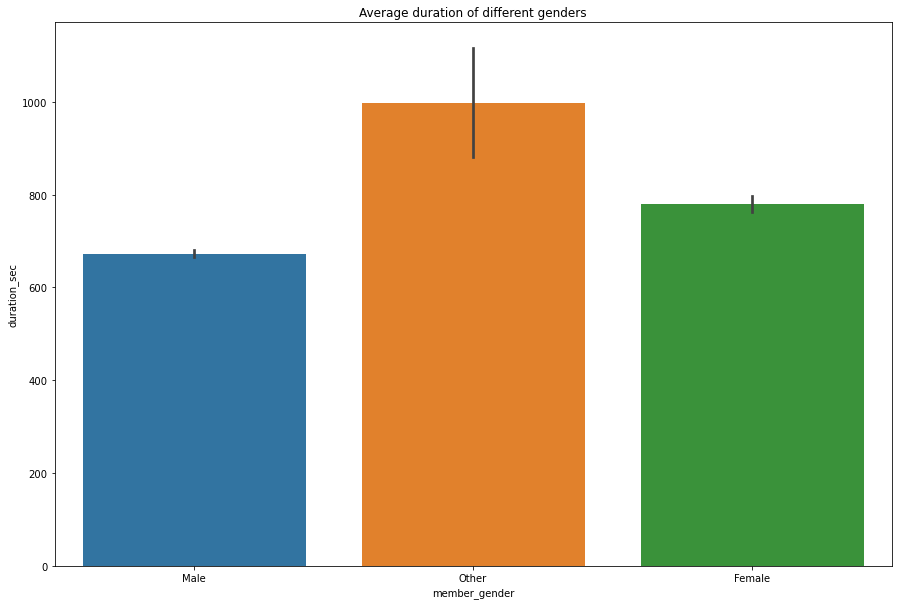

In [34]:
plt.figure(figsize = (15,10))
plt.title('Duration of sharing by genders')
plt.ylabel('Duration in seconds')
plt.xlabel('Gender')
sns.barplot(x = 'member_gender', y = 'duration_sec', data = df_clean)
plt.title('Average duration of different genders')

On average, the gender group Other uses the bikesharing longer than the Male and Femal group.

### Do some customers use share bikes longer?

<AxesSubplot:title={'center':'Average duration of Customers vs. Subscribers'}, xlabel='user_type', ylabel='duration_sec'>

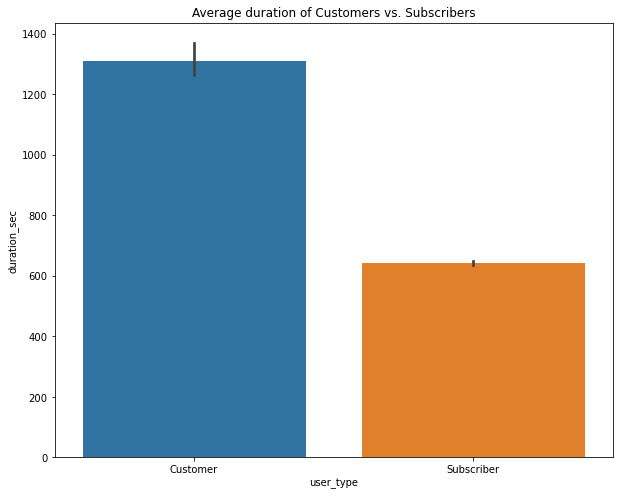

In [35]:
plt.figure(figsize = (10,8))
plt.title('Average duration of Customers vs. Subscribers')
plt.xlabel('Duration of sharing')
plt.ylabel('Usertype')
sns.barplot(x = 'user_type', y = 'duration_sec', data = df_clean)

The Customers using the bike sharing service significantly longer than subscribers.

### Ratio of male, female, diverse customers

([<matplotlib.patches.Wedge at 0x7f082bcdd1d0>,
 [Text(-0.7811658191588458, 0.7744546229301557, 'Male'),
  Text(0.7305184697788278, -0.8224006112059985, 'Female'),
  Text(1.0977891049550876, -0.0697071089768318, 'Other')],
 [Text(-0.42609044681391584, 0.42242979432553945, '75.1'),
  Text(0.3984646198793606, -0.4485821515669082, '22.8'),
  Text(0.5987940572482295, -0.03802205944190825, '2.0')])

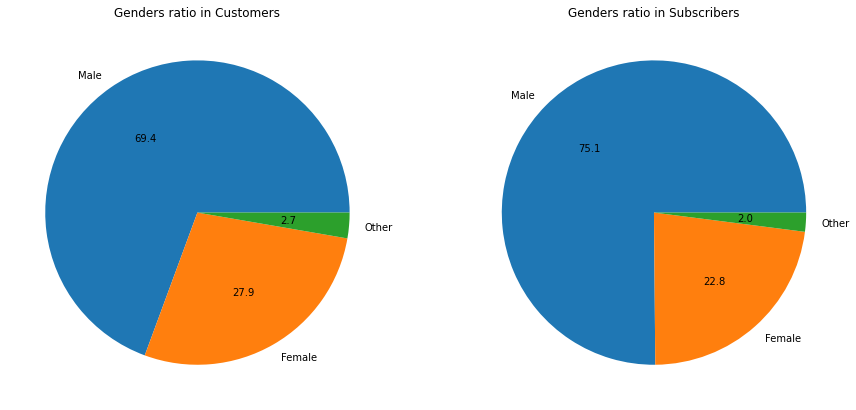

In [36]:
customers_df = df_clean[df_clean.user_type == "Customer"]
subscribers_df = df_clean[df_clean.user_type == "Subscriber"]
fig = plt.figure(figsize = (15,15))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.title.set_text('Genders ratio in Customers')
ax2.title.set_text('Genders ratio in Subscribers')
ax1.pie(customers_df.member_gender.value_counts().values.astype(int), labels = customers_df.member_gender.value_counts().index, autopct='%.1f')
ax2.pie(subscribers_df.member_gender.value_counts().values.astype(int), labels = subscribers_df.member_gender.value_counts().index, autopct='%.1f')

Given the fact, that there are significant more male people are using bikesharing it's not surprising that the ratio is following looking like that. It seems though, that the ratio of woman who are customers are slightly higher thatn who are subscribers.

### Is there a station where more female than male riders are?

In [37]:
df_female = df_clean[df_clean.member_gender == "Female"]
df_female.start_station_id.value_counts().sort_index()

3.0      567
4.0      100
5.0      467
6.0      524
7.0      274
        ... 
385.0     92
386.0    137
388.0      6
389.0      1
398.0      2
Name: start_station_id, Length: 326, dtype: int64

In [38]:
df_male = df_clean[df_clean.member_gender == "Male"]
df_male.start_station_id.value_counts().sort_index()

3.0      2009
4.0       449
5.0      1614
6.0      1418
7.0       492
         ... 
385.0     248
386.0     286
388.0      11
389.0      10
398.0      14
Name: start_station_id, Length: 329, dtype: int64

In [39]:
(df_male.start_station_id.value_counts().sort_index() - df_female.start_station_id.value_counts().sort_index()).sort_values()

219.0     -56.0
227.0     -20.0
297.0     -13.0
231.0     -12.0
290.0      -9.0
          ...  
58.0     1824.0
67.0     1934.0
224.0       NaN
283.0       NaN
344.0       NaN
Name: start_station_id, Length: 329, dtype: float64

The difference is not very significant and in conclusion the stations have a balance between male and female genders.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Are there any differences in the routine of bikesharing between genders?

<AxesSubplot:title={'center':'Number of bikeshares throughout the day separated by genders'}, xlabel='Hour of the day', ylabel='Number of Bikeshares'>

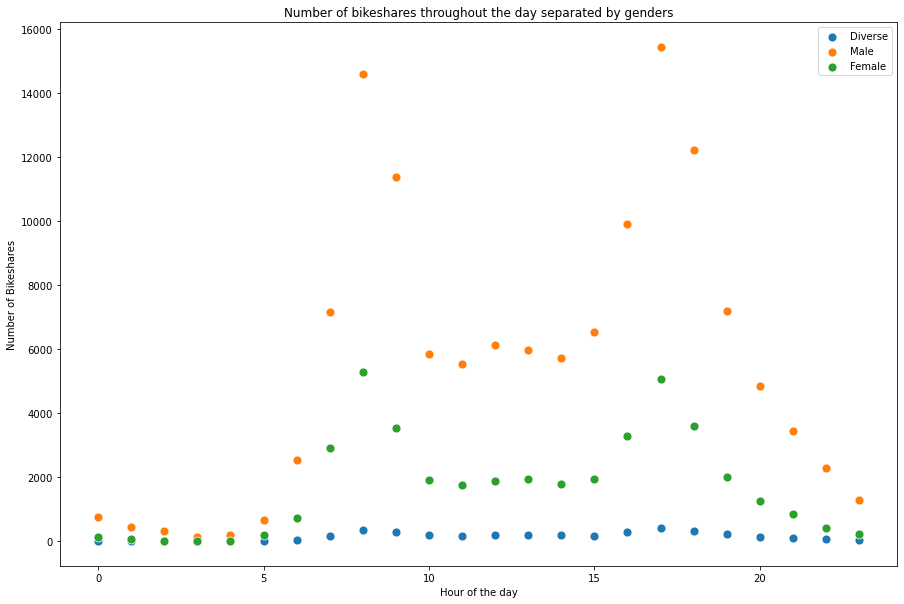

In [40]:
df_female = df_clean[df_clean.member_gender == 'Female']
df_male = df_clean[df_clean.member_gender == 'Male']
df_div = df_clean[df_clean.member_gender == 'Other']

plt.figure(figsize = (15, 10))
plt.title('Number of bikeshares throughout the day separated by genders')
plt.ylabel('Number of Bikeshares')
plt.xlabel('Hour of the day')

sns.scatterplot(x = df_div['start_hour'].value_counts().sort_index().index, y = df_div['start_hour'].value_counts().sort_index().values, s = 80, label = "Diverse")
sns.scatterplot(x = df_male['start_hour'].value_counts().sort_index().index, y = df_male['start_hour'].value_counts().sort_index().values, s = 80, label = "Male")
sns.scatterplot(x = df_female['start_hour'].value_counts().sort_index().index, y = df_female['start_hour'].value_counts().sort_index().values, s = 80, label = "Female")

Expecting a difference in genders as when there peaks are, it turned out that all genders seem to have the same pattern through out the day.

<AxesSubplot:>

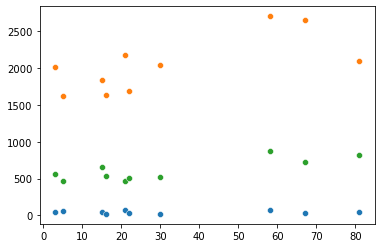

In [41]:
temp_df = df_clean[df_clean.start_station_id.isin(top10_index)]
df_female = temp_df[temp_df.member_gender == 'Female']
df_male = temp_df[temp_df.member_gender == 'Male']
df_div = temp_df[temp_df.member_gender == 'Other']

sns.scatterplot(x = df_div['start_station_id'].value_counts().sort_index().index, y = df_div['start_station_id'].value_counts().sort_index().values)
sns.scatterplot(x = df_male['start_station_id'].value_counts().sort_index().index, y = df_male['start_station_id'].value_counts().sort_index().values)
sns.scatterplot(x = df_female['start_station_id'].value_counts().sort_index().index, y = df_female['start_station_id'].value_counts().sort_index().values)

### What about the top5 station's bikesharing during the day?

<Figure size 1440x1080 with 0 Axes>

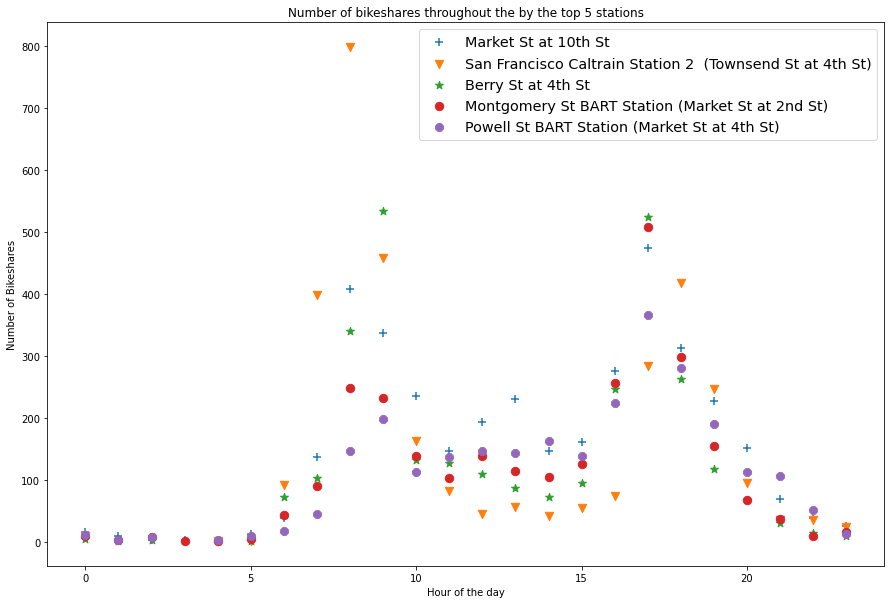

In [42]:
plt.figure(figsize=(20,15))
plt.figure(figsize = (15, 10))
plt.title('Number of bikeshares throughout the by the top 5 stations')
plt.ylabel('Number of Bikeshares')
plt.xlabel('Hour of the day')
markers = ['+', 'v', '*', 'o', '8']
for j, i in zip(range(5),top10_index[:5]):
    temp_df = df_clean[df_clean.start_station_id == i]
    plt.scatter(x = temp_df['start_hour'].value_counts().sort_index().index, y = temp_df['start_hour'].value_counts().sort_index().values, s = 70, marker = markers[j], label = top10_names[j])
plt.legend(fontsize = 'x-large')

The pattern that during mornings beginning of work and afternoon finishing work seems to go through all the stations, especially the top5. Interestingly the most used stations are near metrostations, so that bikesharing is second part of commute.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!